In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [6]:
pole_names = [
    ("Care", "Harm"),
    ("Fairness", "Cheating"),
    ("Loyalty", "Betrayal"),
    ("Authority", "Subversion"),
    ("Sanctity", "Degredation"),
]
columns = [pole[0] for pole in pole_names]


In [18]:
#Political
center_df = pd.read_csv("new_cluster/custom_files/dimensions/center.csv", skiprows=2, header=None, names=columns)
center_left_df = pd.read_csv(
    "new_cluster/custom_files/dimensions/center-left.csv", skiprows=2, header=None, names=columns
)
right_df = pd.read_csv("new_cluster/custom_files/dimensions/right.csv", skiprows=2, header=None, names=columns)

In [7]:
#Combined
combined_df = pd.read_csv("new_cluster/custom_files/dimensions/combined_dimensions.csv", skiprows=2, header=None, names=columns)

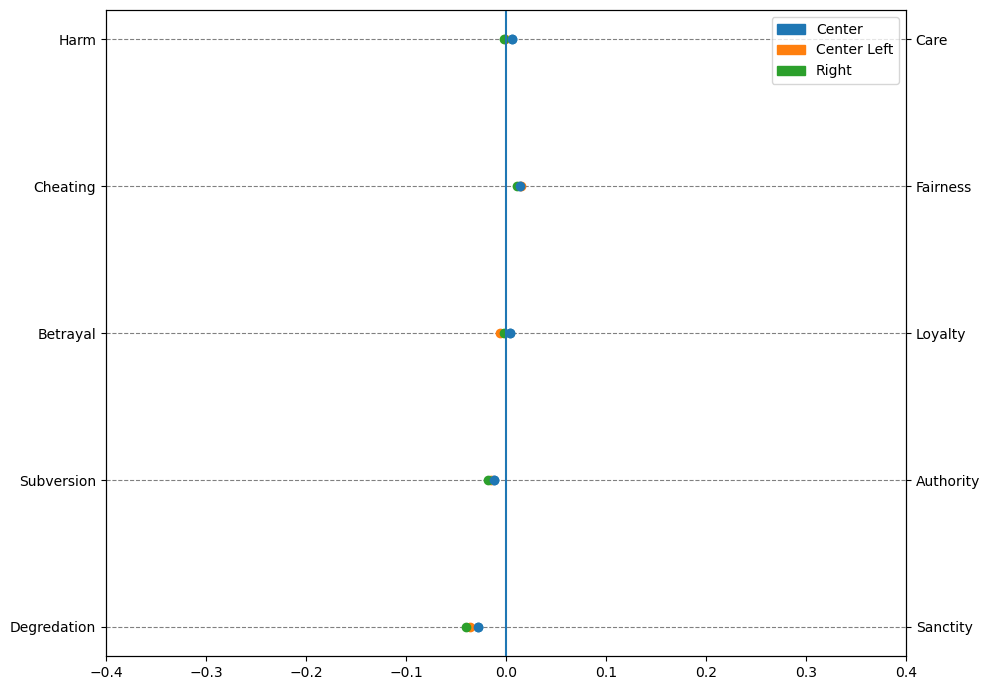

In [12]:
def visualize_means(dfs, titles):
    labels_right, labels_left = zip(*pole_names)
    means = [df.mean() for df in dfs]
    colors = list(mcolors.TABLEAU_COLORS) + list(mcolors.BASE_COLORS) + list(mcolors.CSS4_COLORS)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    plt.axvline(0)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color="gray", linestyle="dashed")
    plt.xlim(-0.1, 0.1)
    plt.xlim(-0.4, 0.4)
    ax2.scatter(x=means[0], y=labels_right)  # only needed for labels on the right
    legend_entries = []
    for i in range(0, len(dfs)):
        legend_entries.append(mpatches.Patch(color=colors[i], label=titles[i]))
        ax1.scatter(x=means[i], y=labels_left)

    ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.legend(handles=legend_entries)
    plt.show()


visualize_means(
    [center_df, center_left_df, right_df],
    ["Center", "Center Left", "Right"],
)

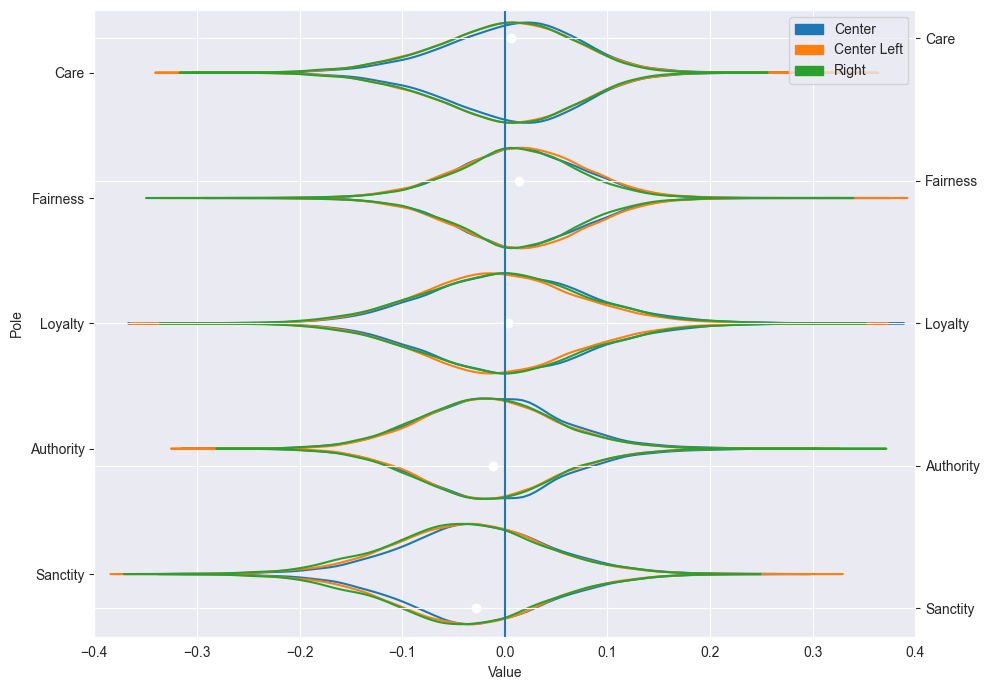

In [19]:
def visualize_means(dfs, titles):
    means = [df.mean() for df in dfs]
    labels_right, labels_left = zip(*pole_names)
    colors = list(mcolors.TABLEAU_COLORS) + list(mcolors.BASE_COLORS) + list(mcolors.CSS4_COLORS)

    melted_dfs = []
    for df in dfs:
        # combine the columns
        # add a column for the pole name
        melted_dfs.append(df.melt(var_name="Pole", value_name="Value"))

    # create one subplot for each pole
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    plt.axvline(0)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color="gray", linestyle="dashed")
    ax2.scatter(x=means[0], y=labels_right, c="white")  # invisible scatter for labels on the right
    plt.xlim(-0.1, 0.1)
    plt.xlim(-0.4, 0.4)
    legend_entries = []
    for i in range(len(dfs)):
        df = melted_dfs[i]
        legend_entries.append(mpatches.Patch(color=colors[i], label=titles[i]))
        sns.violinplot(data=df, x="Value", y="Pole", ax=ax1, fill=False, inner=None, density_norm="width")

    # ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.legend(handles=legend_entries, loc="upper right")
    plt.show()


visualize_means([center_df, center_left_df, right_df], ["Center", "Center Left", "Right"])

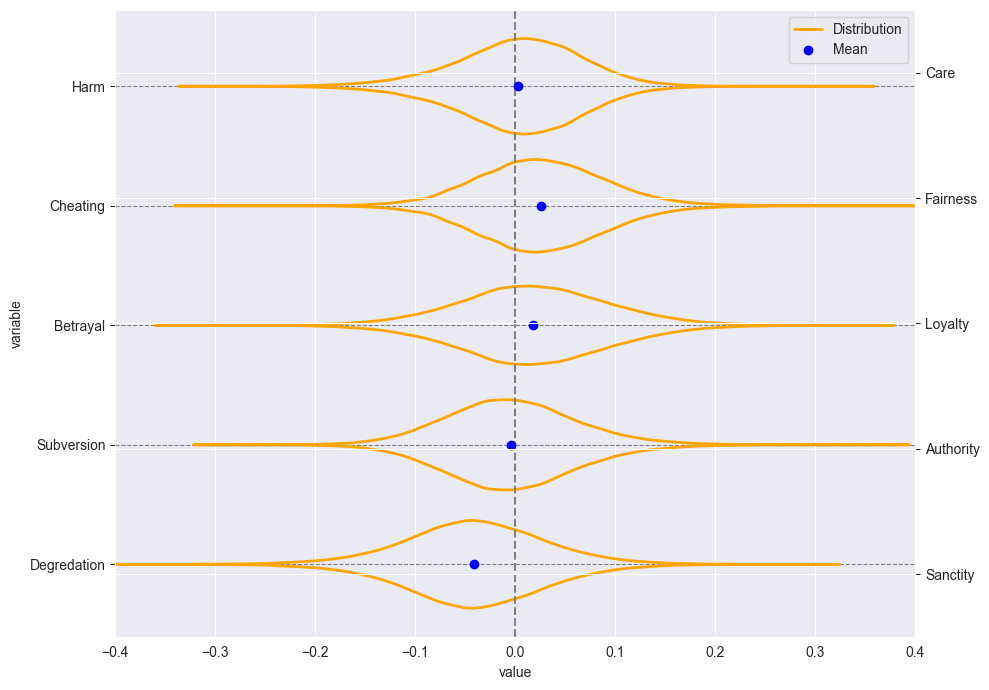

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def visualize_means(dfs, titles, pole_names):
    means = [df.mean() for df in dfs]
    labels_right, labels_left = zip(*pole_names)
    poles = list(dfs[0].columns)
    orange_color = "orange"
    blue_color = "blue"

    # Melt and label all dataframes
    melted_dfs = []
    for i, df in enumerate(dfs):
        melted = pd.melt(df)
        melted["Group"] = titles[i]
        melted_dfs.append(melted)

    combined_melted = pd.concat(melted_dfs)

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.violinplot(
        data=combined_melted,
        x="value",
        y="variable",
        hue=None,  # disable automatic legend
        split=False,
        ax=ax,
        fill=False,
        inner=None,
        color=orange_color,
        order=poles,
        linewidth=2
    )

    ax.axvline(0, color='gray', linestyle='--')
    ax.set_xlim(-0.4, 0.4)
    ax.set_axisbelow(True)
    ax.grid(True, axis='y', linestyle='dashed', color='gray')

    # Set left and right y-axis labels
    ax.set_yticks(range(len(poles)))
    ax.set_yticklabels(labels_left)
    ax2 = ax.twinx()
    ax2.set_yticks(range(len(poles)))
    ax2.set_yticklabels(labels_right)
    ax2.set_ylim(ax.get_ylim())
    ax.set_xlabel("")
    ax.set_ylabel("")
    # Plot blue mean dots
    for mean in means:
        ax.scatter(mean.values, range(len(poles)), color=blue_color, zorder=3)

    # Custom legend entries
    distribution_line = mlines.Line2D([], [], color=orange_color, linewidth=2, label='Distribution')
    mean_dot = mlines.Line2D([], [], color=blue_color, marker='o', linestyle='None', label='Mean')

    ax.legend(handles=[distribution_line, mean_dot], loc="upper right")
    plt.tight_layout()
    plt.savefig("new_cluster/plots/violin_dimension_full_dataset.png")
    plt.show()

visualize_means([combined_df], ["Distribution"],pole_names)


C:\Users\riedl\AppData\Local\Temp\ipykernel_25688\2962945197.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


NameError: name 'mlines' is not defined

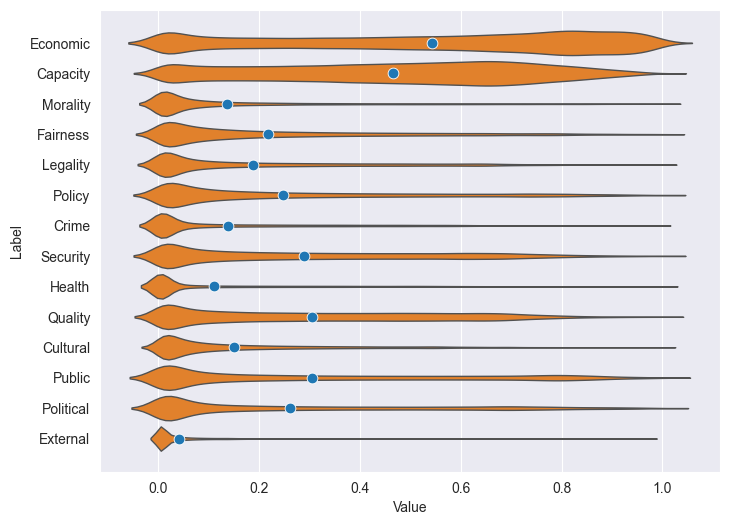

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_violins(file_paths, custom_names, output_dir, name="Temp", colors=None):
    if not file_paths or len(file_paths) != len(custom_names):
        print("Error: Ensure file_paths and custom_names are non-empty and have the same length.")
        return

    # Load and melt data
    long_df_list = []
    for file_path, label in zip(file_paths, custom_names):
        df = pd.read_csv(file_path)
        melted = df.melt(var_name="Label", value_name="Value")
        melted["Source"] = label
        long_df_list.append(melted)
    long_df = pd.concat(long_df_list, ignore_index=True)

    # Custom colors
    orange_color = "#FF7F0E"  # Distribution (violin)
    blue_color = "#1F77B4"    # Mean (dot)

    plt.figure(figsize=(8, 6))
    ax = sns.violinplot(
        data=long_df,
        x="Value",
        y="Label",
        scale="width",
        inner=None,
        linewidth=1,
        color=orange_color
    )

    # Add mean points
    means = long_df.groupby("Label")["Value"].mean().reset_index()
    sns.scatterplot(
        data=means,
        x="Value",
        y="Label",
        color=blue_color,
        marker='o',
        s=60,
        ax=ax
    )

    # Custom legend
    distribution_line = mlines.Line2D([], [], color=orange_color, linewidth=2, label='Distribution')
    mean_dot = mlines.Line2D([], [], color=blue_color, marker='o', linestyle='None', label='Mean')
    ax.legend(handles=[distribution_line, mean_dot], loc="lower right")


    
    
    plt.title(name)
    plt.xlabel("")
    plt.ylabel("")
    plt.xlim(0, 1.2)
    plt.tight_layout()

    plt.savefig(output_dir, bbox_inches="tight")
    plt.show()
file_paths = ["new_cluster/custom_files/labels/combined_labels.csv"]
custom_names = ["Distribution"]
output_dir = "new_cluster/plots"
plot_name = "Distribution"

plot_label_violins(file_paths, custom_names, output_dir, name=plot_name)